# Single Class Mask Generation from annotaions text for Stardist

In [38]:
import numpy as np
from PIL import Image
import os

# Function to draw a circle on the mask
def draw_circle_on_mask(mask, x, y, radius, label):
    for i in range(mask.shape[0]):
        for j in range(mask.shape[1]):
            if ((i - y) ** 2 + (j - x) ** 2) ** 0.5 <= radius:
                mask[i, j] = label

# Directory containing the annotation files
annotations_dir = '/Users/yshokrollahi/Desktop/MD/Project4/Dataset/StarDist/All_Data-1/labels'

# Fixed radius for the circles
radius = 10  # Radius of the circles to be drawn

# Initialize an empty mask size (assuming it's the same for all images)
image_size = 640

# List all text files in the annotations directory
annotation_files = [f for f in os.listdir(annotations_dir) if f.endswith('.txt')]

# Process each annotation file
for annotation_file in annotation_files:
    # Initialize a new mask for each file
    mask = np.zeros((image_size, image_size), dtype=np.uint16)

    # Build the full path to the annotation file
    annotation_path = os.path.join(annotations_dir, annotation_file)

    # Read the annotations and draw circles on the mask
    with open(annotation_path, 'r') as file:
        for i, line in enumerate(file.readlines()):
            parts = line.strip().split()
            _, x_center, y_center, _, _ = map(float, parts)  # Width and height are not needed for circles
            
            # Convert normalized coordinates to absolute coordinates
            x_center_abs, y_center_abs = x_center * image_size, y_center * image_size

            # Draw circle on the mask with a unique label (i+1 to avoid label 0)
            draw_circle_on_mask(mask, x_center_abs, y_center_abs, radius, i + 1)

    # Save the mask as a TIFF image
    mask_image = Image.fromarray(mask)
    mask_filename = os.path.splitext(annotation_file)[0] + '.tiff'  # Create a corresponding mask filename
    mask_image.save(os.path.join('/Users/yshokrollahi/Desktop/MD/Project4/Dataset/StarDist/All_Data-1/masks', mask_filename))


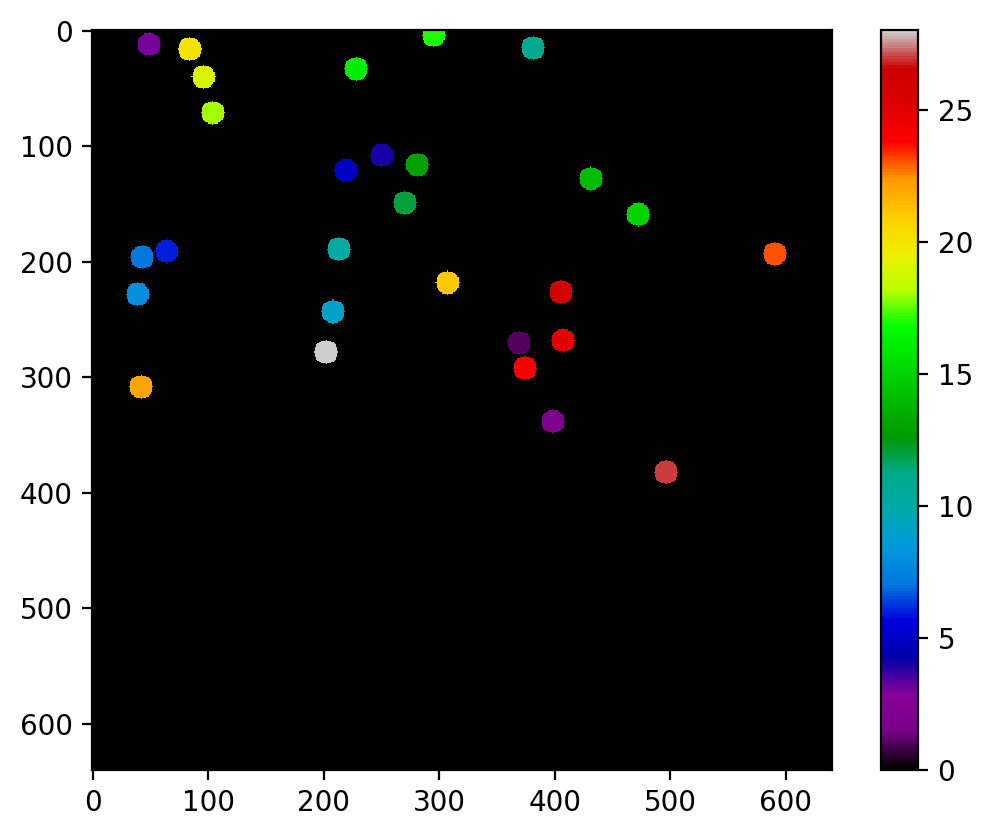

In [39]:
import matplotlib.pyplot as plt

plt.imshow(mask, cmap='nipy_spectral')
plt.colorbar()  # To see the range of label values
plt.show()


# Multi-Class

In [ ]:
import numpy as np
from PIL import Image
import os
import json

def draw_circle_on_mask(mask, x, y, radius, label_id):
    """Draws a circle on the mask with the given label_id."""
    for i in range(mask.shape[0]):
        for j in range(mask.shape[1]):
            if ((i - y) ** 2 + (j - x) ** 2) ** 0.5 <= radius:
                mask[i, j] = label_id

def create_masks_and_cls_dicts(annotations_dir, masks_dir, cls_dicts_dir, image_size=640, radius=10):
    if not os.path.exists(masks_dir):
        os.makedirs(masks_dir)
    if not os.path.exists(cls_dicts_dir):
        os.makedirs(cls_dicts_dir)

    annotation_files = [f for f in os.listdir(annotations_dir) if f.endswith('.txt')]

    for annotation_file in annotation_files:
        mask = np.zeros((image_size, image_size), dtype=np.uint16)
        cls_dict = {}
        label_id_counter = 1  # Reset labeling from 1 for each new image

        with open(os.path.join(annotations_dir, annotation_file), 'r') as file:
            for line in file:
                parts = line.strip().split()
                class_label, x_center, y_center, _, _ = map(float, parts)
                x_center_abs, y_center_abs = int(x_center * image_size), int(y_center * image_size)
                
                # Draw a circle for the cell with a unique label
                draw_circle_on_mask(mask, x_center_abs, y_center_abs, radius, label_id_counter)
                
                # Map the unique label to its class (adding 1 to ensure class starts from 1)
                cls_dict[label_id_counter] = int(class_label) + 1
                
                label_id_counter += 1  # Increment label ID for the next cell

        # Save the mask with uniquely labeled cells
        mask_image = Image.fromarray(mask)
        mask_filename = os.path.splitext(annotation_file)[0] + '.tiff'
        mask_image.save(os.path.join(masks_dir, mask_filename))

        # Save the cls_dict that maps cell labels to their classes
        cls_dict_filename = os.path.splitext(annotation_file)[0] + '.json'
        with open(os.path.join(cls_dicts_dir, cls_dict_filename), 'w') as json_file:
            json.dump(cls_dict, json_file)


# Example usage with your paths
annotations_dir = '/Users/yshokrollahi/Desktop/MD/Project4/Dataset/StarDist/All_Data-1/train-multi-class/labels'
masks_dir = '/Users/yshokrollahi/Desktop/MD/Project4/Dataset/StarDist/All_Data-1/train-multi-class/masks'
cls_dicts_dir = '/Users/yshokrollahi/Desktop/MD/Project4/Dataset/StarDist/All_Data-1/train-multi-class/cls_dicts'

create_masks_and_cls_dicts(annotations_dir, masks_dir, cls_dicts_dir)